**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: Armando Cerda
*   MATRÍCULA: A01570376

*   NOMBRE: Christopher Parga
*   MATRÍCULA: A00818942

*   NOMBRE: Julio Ruiz
*   MATRÍCULA: A01794742

*   NOMBRE: Mayra Cabrera
*   MATRÍCULA: A01795439

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [100]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe. 

In [101]:
cereals_df.describe(include='all') # Tanto para numéricas como para no númericas.

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,100%_Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico. 

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)? 

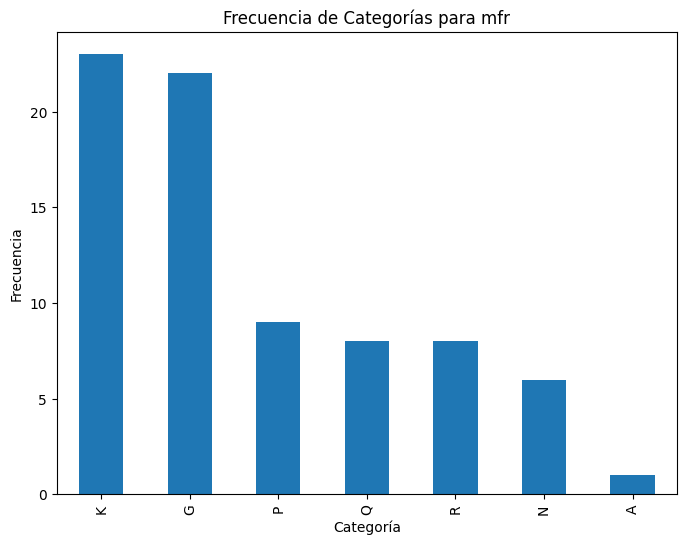

In [102]:
# Gráfico de barras para la variable 'mfr'
plt.figure(figsize=(8, 6))
cereals_df['mfr'].value_counts().plot(kind='bar')
plt.title('Frecuencia de Categorías para mfr')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

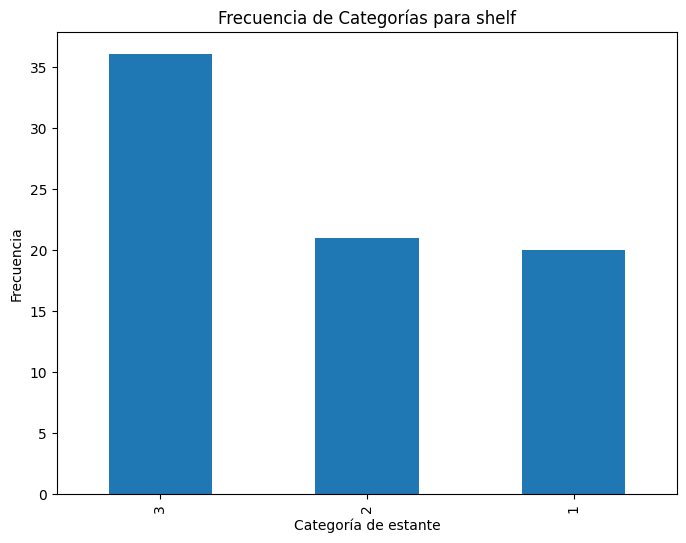

In [103]:
# Gráfico de barras para la variable 'shelf'
plt.figure(figsize=(8, 6))
cereals_df['shelf'].value_counts().plot(kind='bar')
plt.title('Frecuencia de Categorías para shelf')
plt.xlabel('Categoría de estante')
plt.ylabel('Frecuencia')
plt.show()

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante. 

In [104]:
mfr_shelf = cereals_df.groupby(['mfr', 'shelf']).size().unstack()
mfr_shelf

shelf,1,2,3
mfr,,,
A,NaN,1.0,NaN
G,6.0,7.0,9.0
K,4.0,7.0,12.0
N,3.0,2.0,1.0
P,2.0,1.0,6.0
Q,1.0,3.0,4.0
R,4.0,NaN,4.0


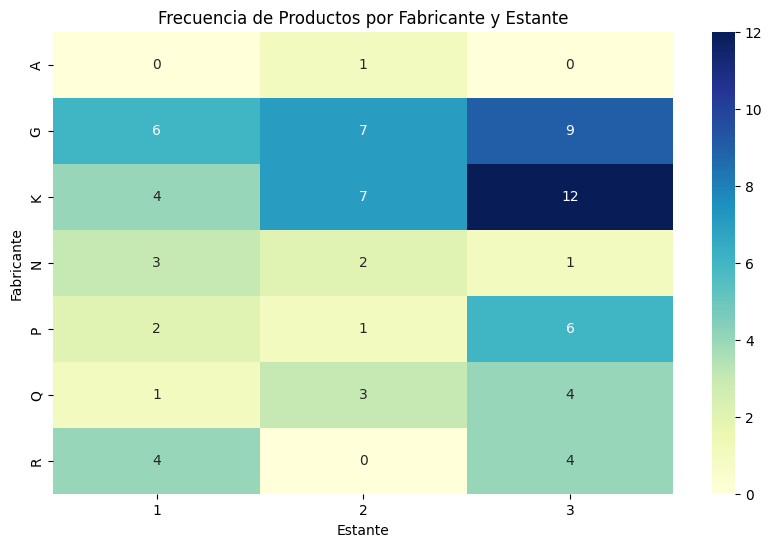

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(cereals_df['mfr'], cereals_df['shelf']), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Frecuencia de Productos por Fabricante y Estante")
plt.xlabel("Estante")
plt.ylabel("Fabricante")
plt.show()

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

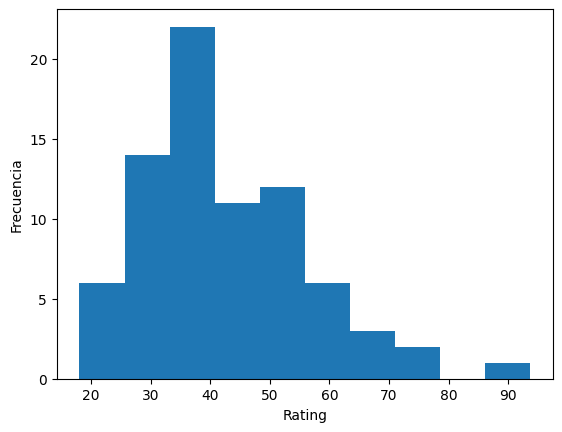

In [106]:
import matplotlib.pyplot as plt

plt.hist(cereals_df['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

# El rango más frecuente es 30-40

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden? 

In [107]:
top_cereals = cereals_df.nlargest(10, 'rating')[['name', 'mfr', 'rating']]
top_10_cereals

,name,mfr
3,All-Bran_with_Extra_Fiber,K
64,Shredded_Wheat_'n'Bran,N
65,Shredded_Wheat_spoon_size,N
0,100%_Bran,N
63,Shredded_Wheat,N
20,Cream_of_Wheat_(Quick),N
55,Puffed_Wheat,Q
54,Puffed_Rice,Q
50,Nutri-grain_Wheat,K
2,All-Bran,K


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots. 

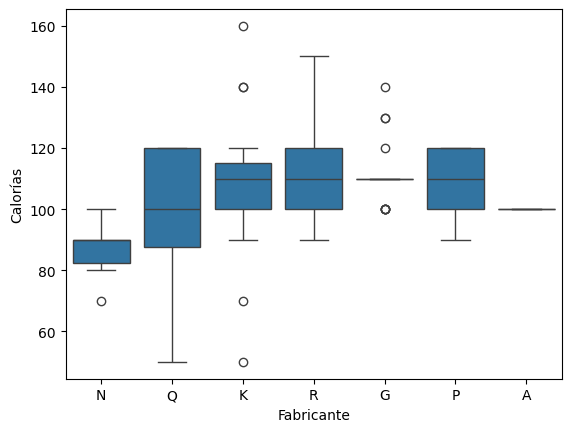

In [108]:
import seaborn as sns

sns.boxplot(data=cereals_df, x='mfr', y='calories')
plt.xlabel('Fabricante')
plt.ylabel('Calorías')
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`? 

In [109]:
numeric_cols = cereals_df.select_dtypes(include=['float64', 'int64'])

correlations = numeric_cols.corr()['rating'].abs().sort_values(ascending=False)
print(correlations[1:3])

sugars      0.763902
calories    0.689376
Name: rating, dtype: float64


5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos. 

In [110]:
df_clean = cereals_df.dropna().reset_index(drop=True)

# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores. 

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

y = df_clean['rating']
X = df_clean.select_dtypes(include=['float64', 'int64']).drop(columns='rating')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes. 

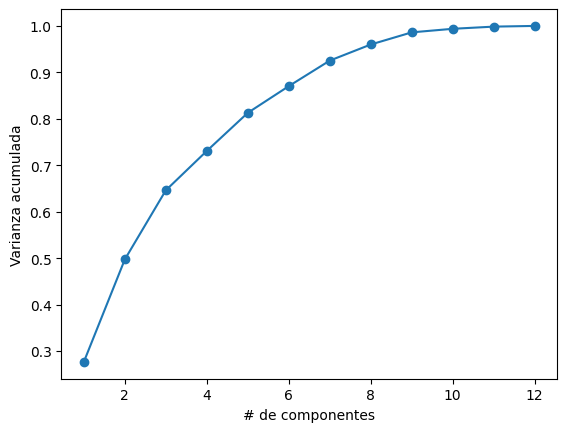

7 componentes explican 90% > de la varianza.


In [112]:
explained_variance = pca.explained_variance_ratio_.cumsum()

plt.plot(range(1, len(explained_variance)+1), explained_variance, '-o')
plt.xlabel('# de componentes')
plt.ylabel('Varianza acumulada')
plt.show()

n_components =(explained_variance > 0.9).argmax() + 1
print(f"{n_components} componentes explican 90% > de la varianza.")


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [113]:
component = pca.components_[0]
print(pd.Series(component, index=X.columns).abs().sort_values(ascending=False).head(3))

potass    0.502603
fiber     0.458623
cups      0.371154
dtype: float64


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica. 

In [114]:
from scipy.stats import pointbiserialr

categorical_dummies = pd.get_dummies(df_clean[df_clean.select_dtypes(include=['object']).columns])

correlations = {}
for col in categorical_dummies:
    pbc = pointbiserialr(categorical_dummies[col], df_clean['rating'])
    correlations[col] = pbc[0] 

threshold = 0.1  
significant_predictors = [key for key, value in correlations.items() if abs(value) > threshold]

print("Variables categóricas significativas:", significant_predictors)

X_categorical =  pd.get_dummies(df_clean[df_clean.select_dtypes(include=['object']).columns])[significant_predictors]


Variables categóricas significativas: ['name_100%_Bran', 'name_All-Bran', 'name_All-Bran_with_Extra_Fiber', 'name_Apple_Cinnamon_Cheerios', "name_Cap'n'Crunch", 'name_Cinnamon_Toast_Crunch', 'name_Cocoa_Puffs', 'name_Count_Chocula', 'name_Frosted_Mini-Wheats', 'name_Fruity_Pebbles', 'name_Golden_Grahams', 'name_Honey-comb', 'name_Honey_Graham_Ohs', 'name_Lucky_Charms', 'name_Maypo', 'name_Mueslix_Crispy_Blend', 'name_Nut&Honey_Crunch', 'name_Nutri-grain_Wheat', 'name_Oatmeal_Raisin_Crisp', 'name_Puffed_Rice', 'name_Puffed_Wheat', 'name_Raisin_Squares', 'name_Shredded_Wheat', "name_Shredded_Wheat_'n'Bran", 'name_Shredded_Wheat_spoon_size', 'name_Strawberry_Fruit_Wheats', 'name_Total_Raisin_Bran', 'name_Trix', 'mfr_A', 'mfr_G', 'mfr_N', 'type_C', 'type_H']


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo. 

In [115]:
X_pca_selected = X_pca[:, :n_components]

final_df = pd.concat([
    pd.DataFrame(X_pca_selected, columns=[f"PC{i+1}" for i in range(n_components)]),
    X_categorical,
    y], axis=1)

final_df.to_csv('processed_data.csv', index=False)
final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,name_100%_Bran,name_All-Bran,name_All-Bran_with_Extra_Fiber,...,name_Shredded_Wheat_spoon_size,name_Strawberry_Fruit_Wheats,name_Total_Raisin_Bran,name_Trix,mfr_A,mfr_G,mfr_N,type_C,type_H,rating
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575,-0.235388,True,False,False,...,False,False,False,False,False,False,True,True,False,68.402973
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041,0.489640,False,False,False,...,False,False,False,False,False,False,False,True,False,33.983679
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861,-1.210340,False,True,False,...,False,False,False,False,False,False,False,True,False,59.425505
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808,0.289695,False,False,True,...,False,False,False,False,False,False,False,True,False,93.704912
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872,-0.493652,False,False,False,...,False,False,False,False,False,True,False,True,False,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,-0.475067,1.161330,0.495373,0.749484,-0.773891,-1.520184,False,False,False,...,False,False,False,False,False,True,False,True,False,39.106174
70,-1.595568,-0.574653,-1.671901,0.380863,-0.489233,0.116453,0.204196,False,False,False,...,False,False,False,True,False,True,False,True,False,27.753301
71,-0.134252,0.612590,1.181098,-1.357046,-0.190222,0.163728,-0.799693,False,False,False,...,False,False,False,False,False,False,False,True,False,49.787445
72,-0.674537,0.568589,1.163186,-1.330649,0.088594,0.644712,0.247744,False,False,False,...,False,False,False,False,False,True,False,True,False,51.592193
